In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

# I. Load Numpy Array

## 1) Google Colab Mount

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## 2) Load NP

In [ ]:
%%time

X_train_age = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Age/X_train_age_Original_128.npy')
y_train_age = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Age/y_train_age_OHE_Original_128.npy')
X_val_age = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Age/X_val_age_Original_128.npy')
y_val_age = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Age/y_val_age_OHE_Original_128.npy')
X_test_age = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Age/X_test_age_Original_128.npy')
y_test_age = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Age/y_test_age_OHE_Original_128.npy')
X_train_gender = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Gender/X_train_gender_Original_128.npy')
y_train_gender = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Gender/y_train_gender_Original_128.npy')
X_val_gender = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Gender/X_val_gender_Original_128.npy')
y_val_gender = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Gender/y_val_gender_Original_128.npy')
X_test_gender = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Gender/X_test_gender_Original_128.npy')
y_test_gender = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Original/Gender/y_test_gender_Original_128.npy')

CPU times: user 133 ms, sys: 1.21 s, total: 1.34 s
Wall time: 35.5 s


# 2. SMOTE

## 1) Reshape for SMOTE

In [ ]:
X_train_age.shape

(13207, 128, 128, 3)

In [ ]:
X_train_age_re = X_train_age.reshape(X_train_age.shape[0], 128*128*3)

In [ ]:
X_train_age_re.shape

(13207, 49152)

## 2) BoarderlineSMOTE

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')

X_train_age_BS, y_train_age_BS = bsmote.fit_resample(X_train_age_re, y_train_age)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
X_train_age_BS.reshape(X_train_age_BS.shape[0], 128, 128, 3)

array([[[[ 30,  30,  30],
         [ 26,  26,  26],
         [ 19,  19,  19],
         ...,
         [100, 100, 100],
         [102, 102, 102],
         [103, 103, 103]],

        [[ 28,  28,  28],
         [ 24,  24,  24],
         [ 18,  18,  18],
         ...,
         [ 85,  85,  85],
         [ 99,  99,  99],
         [104, 104, 104]],

        [[ 27,  27,  27],
         [ 22,  22,  22],
         [ 17,  17,  17],
         ...,
         [ 79,  79,  79],
         [ 97,  97,  97],
         [ 99,  99,  99]],

        ...,

        [[174, 174, 174],
         [174, 174, 174],
         [175, 175, 175],
         ...,
         [201, 201, 201],
         [202, 202, 202],
         [203, 203, 203]],

        [[174, 174, 174],
         [174, 174, 174],
         [174, 174, 174],
         ...,
         [202, 202, 202],
         [205, 205, 205],
         [224, 224, 224]],

        [[174, 174, 174],
         [174, 174, 174],
         [174, 174, 174],
         ...,
         [209, 209, 209],
        

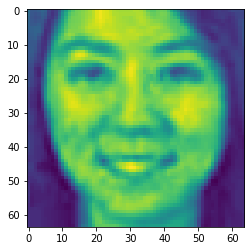

In [ ]:
display(X_train_age[4])

In [ ]:
y_train_age_BS.shape

(28516, 4)

In [ ]:
type(y_train_age_BS)

numpy.ndarray

## 3) SMOTE 결과 확인

In [ ]:
temp_age = []

for i in y_train_age_BS:
  if i[0] == 1:
    temp_age.append(0)
  elif i[1] == 1:
    temp_age.append(1)
  elif i[2] == 1:
    temp_age.append(2)
  else:
    temp_age.append(3)

In [ ]:
ages = pd.Series(temp_age, name = 'Ages')

In [ ]:
ages.value_counts()

3    7789
2    7789
1    7789
0    7789
Name: Ages, dtype: int64

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Borderline_SMOTE/X_train_age_BS_128', X_train_age_BS)
np.save('/content/drive/MyDrive/Colab Notebooks/dataset/Numpy_Array/Borderline_SMOTE/y_train_age_BS_128', y_train_age_BS)

In [ ]:
X_train_age_BS = X_train_age_BS.reshape(X_train_age_BS.shape[0], 64, 64, 3)

In [ ]:
print(X_train_age_BS.shape)
print(y_train_age_BS.shape)
print(X_val_age.shape)
print(y_val_age.shape)
print(X_test_age.shape)
print(y_test_age.shape)

(31156, 64, 64, 3)
(31156, 4)
(4741, 64, 64, 3)
(4741, 4)
(4741, 64, 64, 3)
(4741, 4)
